Cleaned dataset saved successfully.

Descriptive statistics of the dataset
         Speed Limit   Vehicle Year       Latitude      Longitude
count  168515.000000  168515.000000  168515.000000  168515.000000
mean       32.564312    1966.414432      39.083035     -77.112259
std        11.056977     340.454212       0.072106       0.098616
min         0.000000       0.000000      37.720000     -79.486000
25%        25.000000    2006.000000      39.024213     -77.189104
50%        35.000000    2011.000000      39.074843     -77.105148
75%        40.000000    2015.000000      39.139640     -77.039582
max        75.000000    9999.000000      39.990414     -75.527708


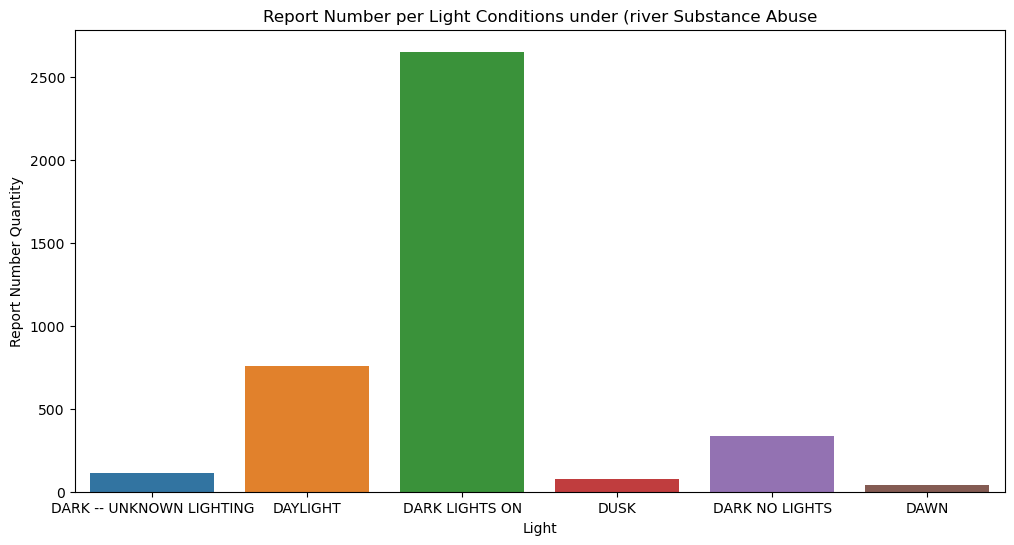

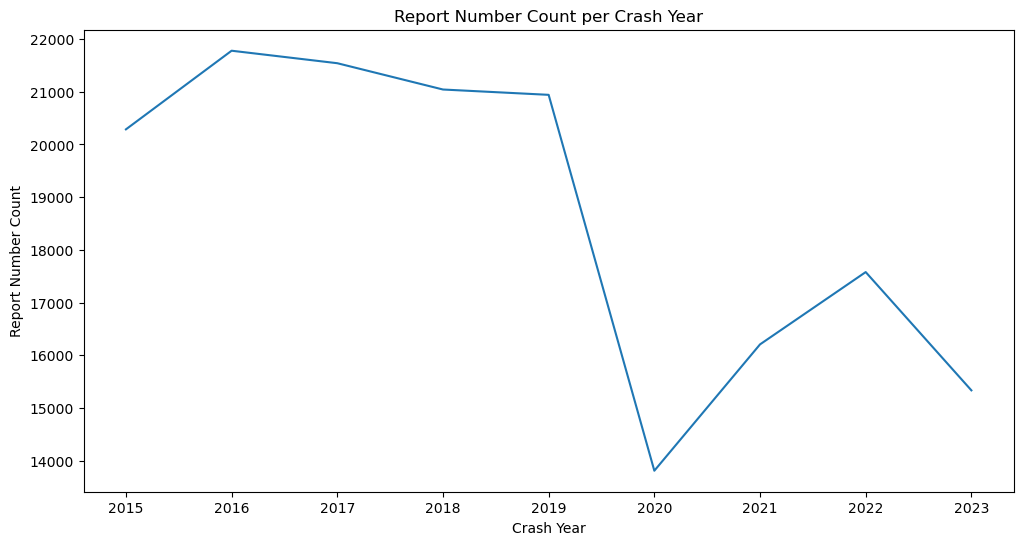

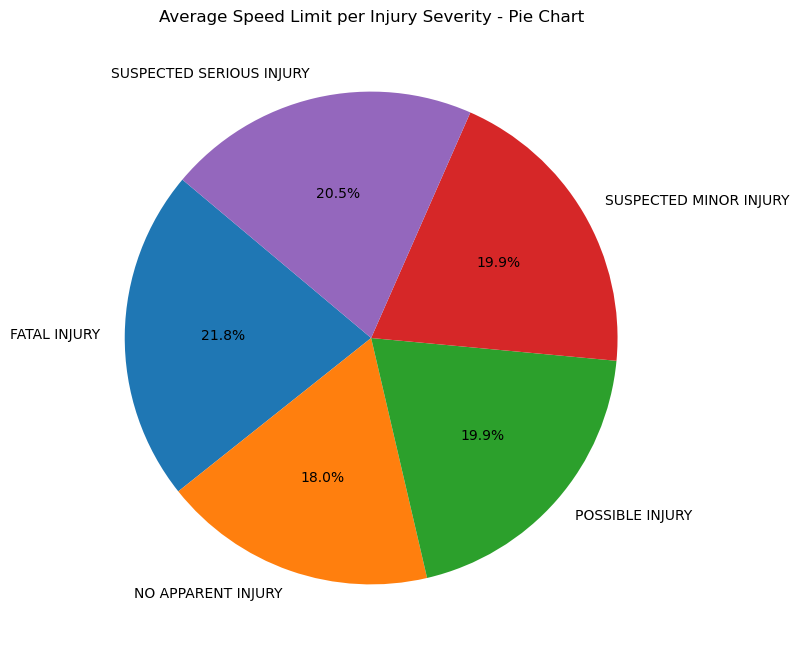

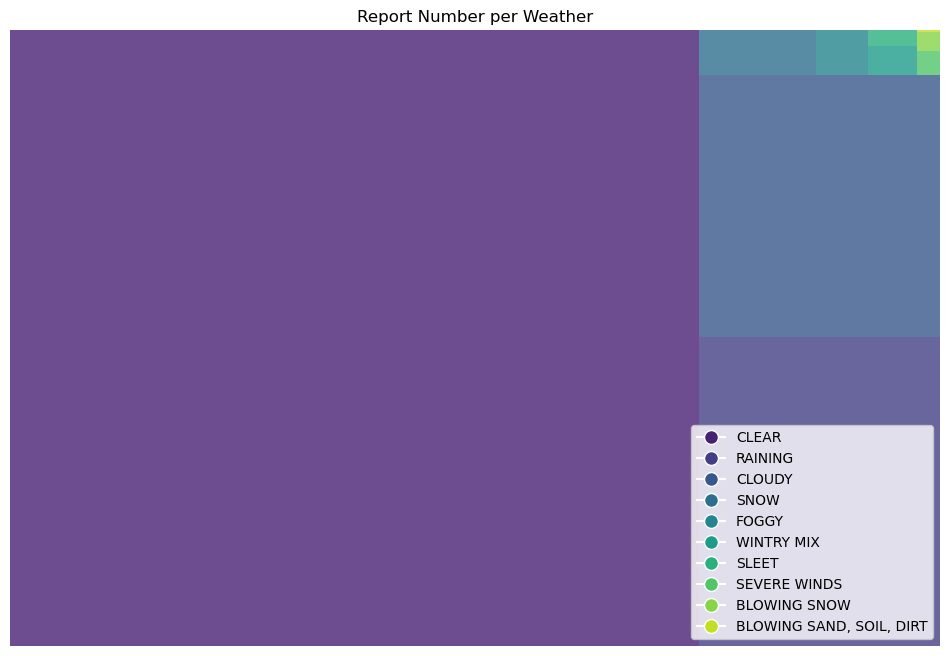

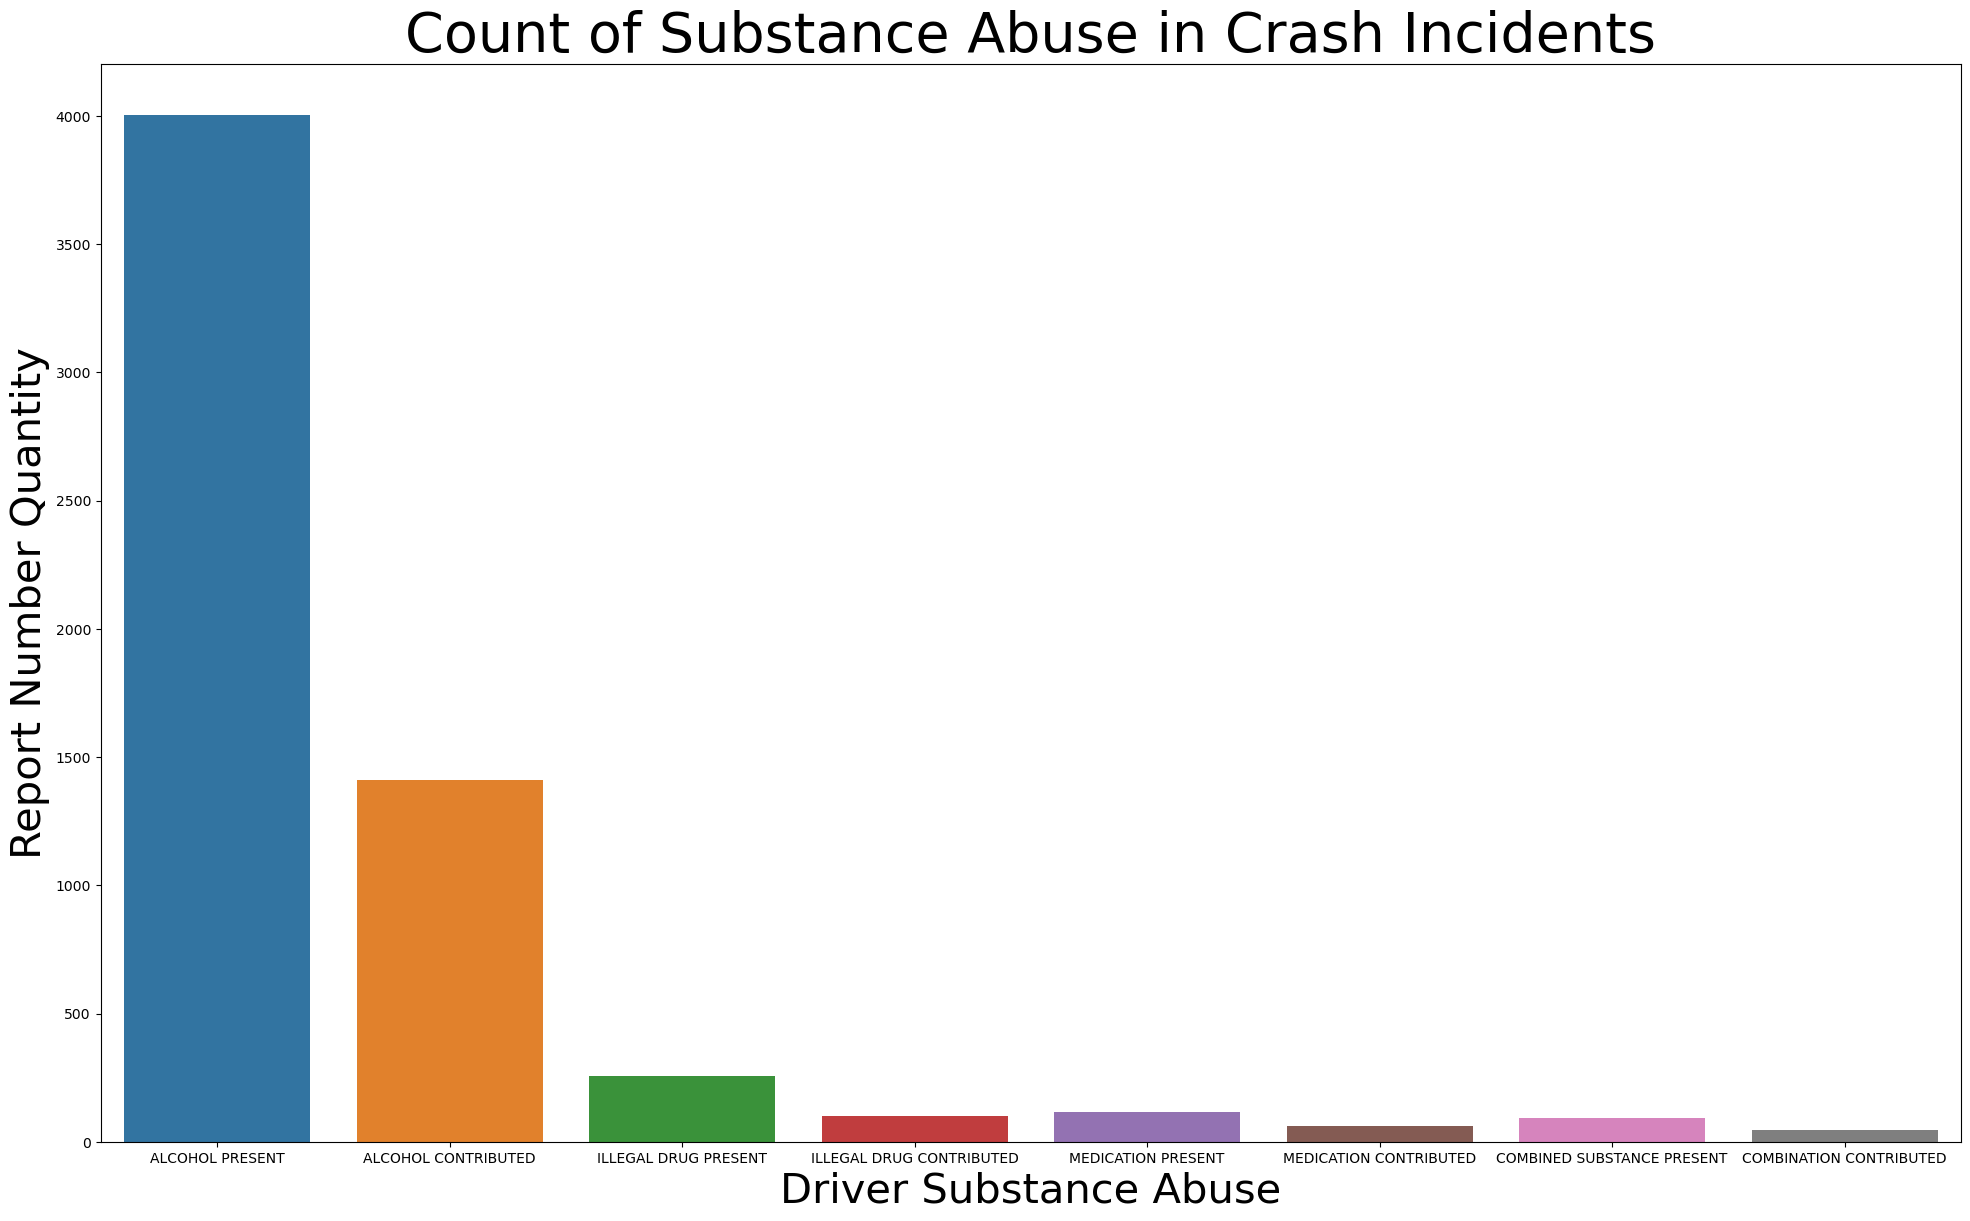

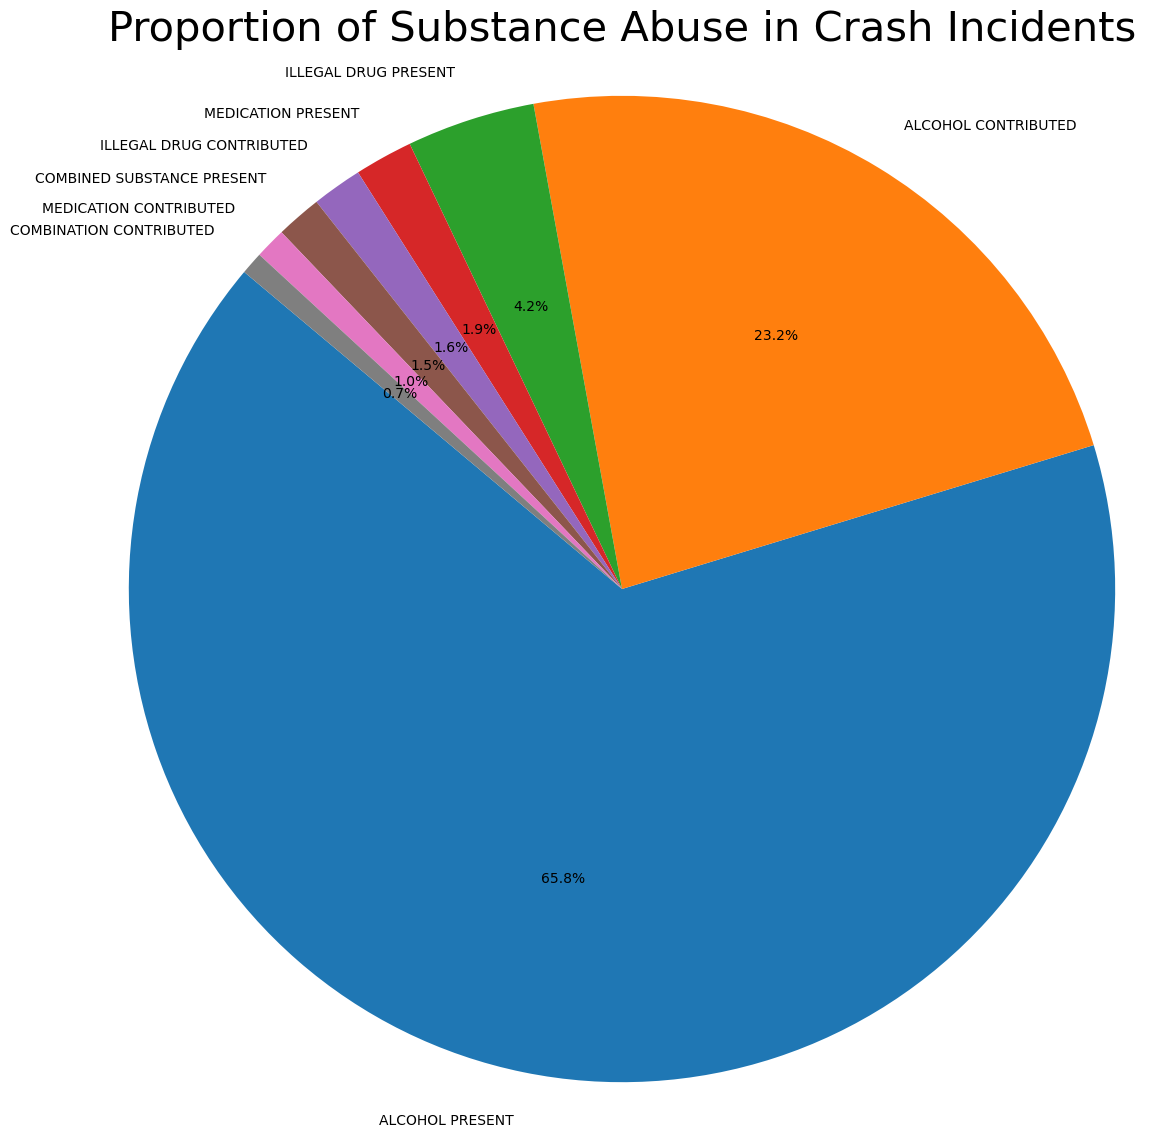

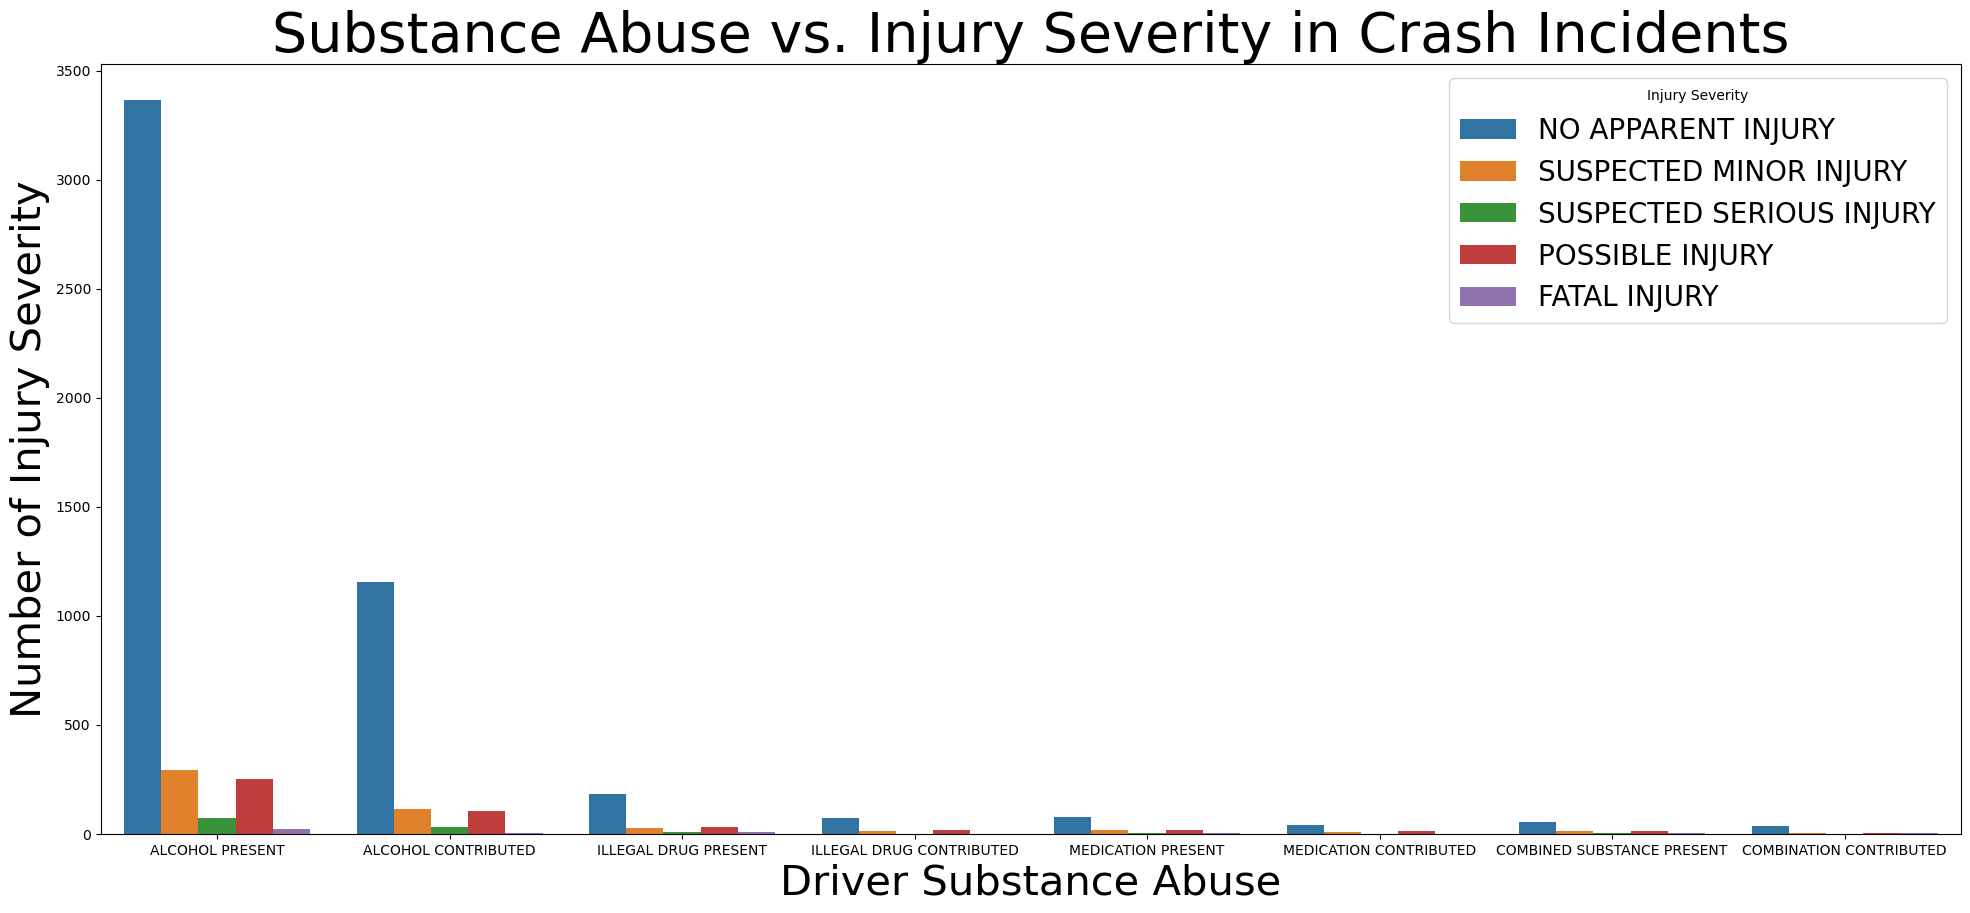

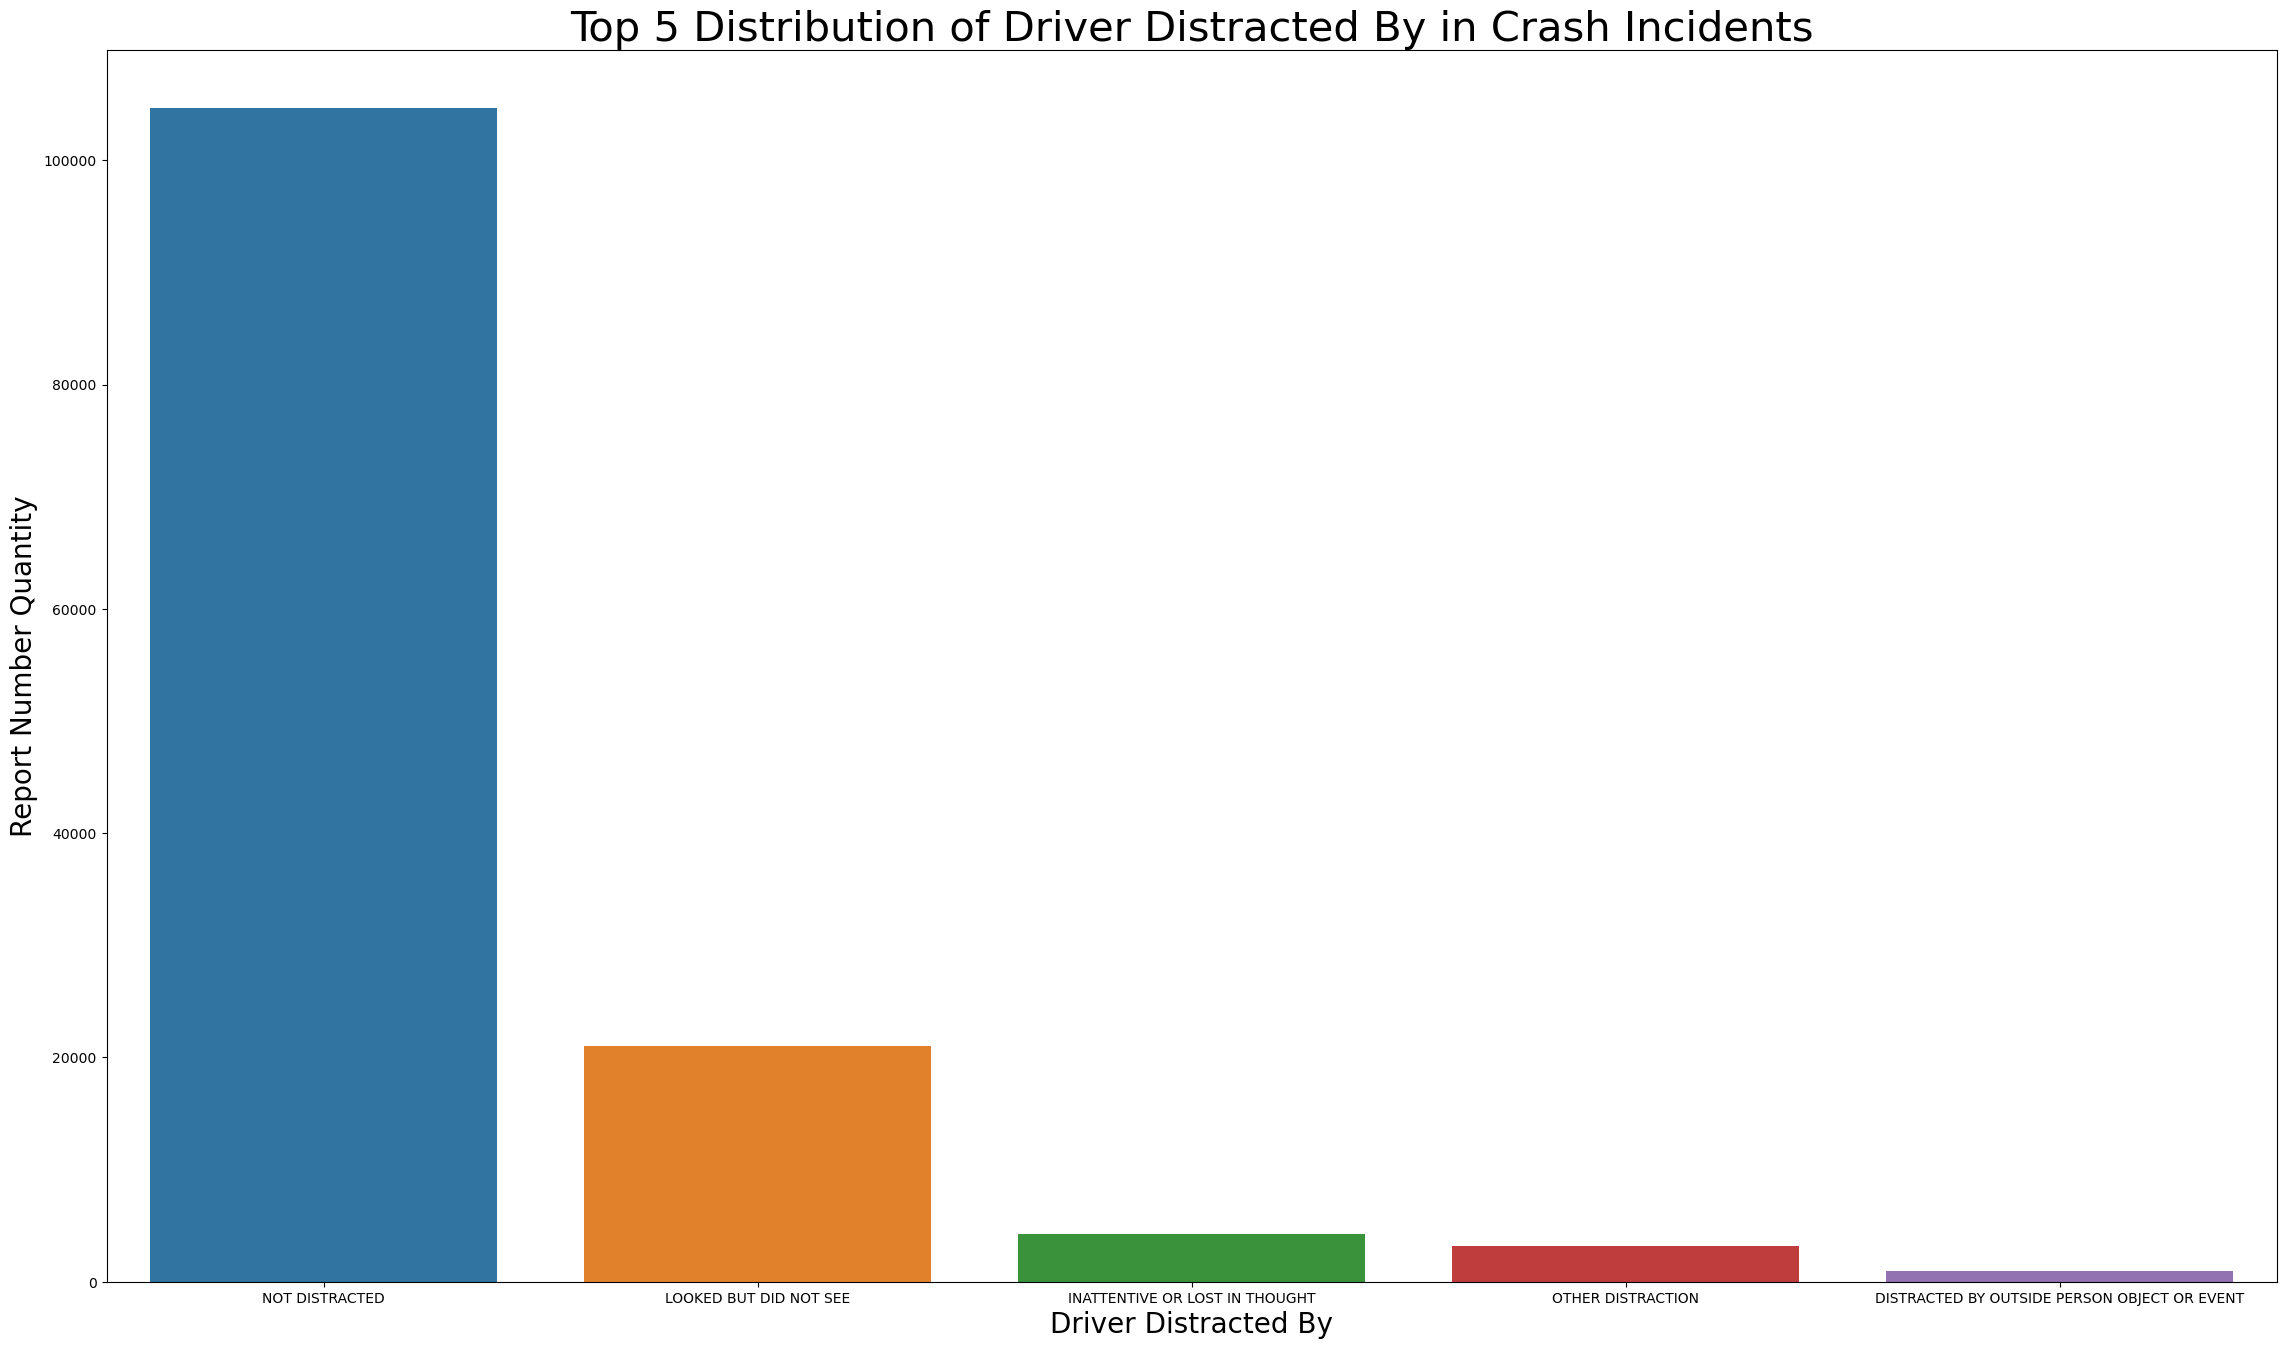

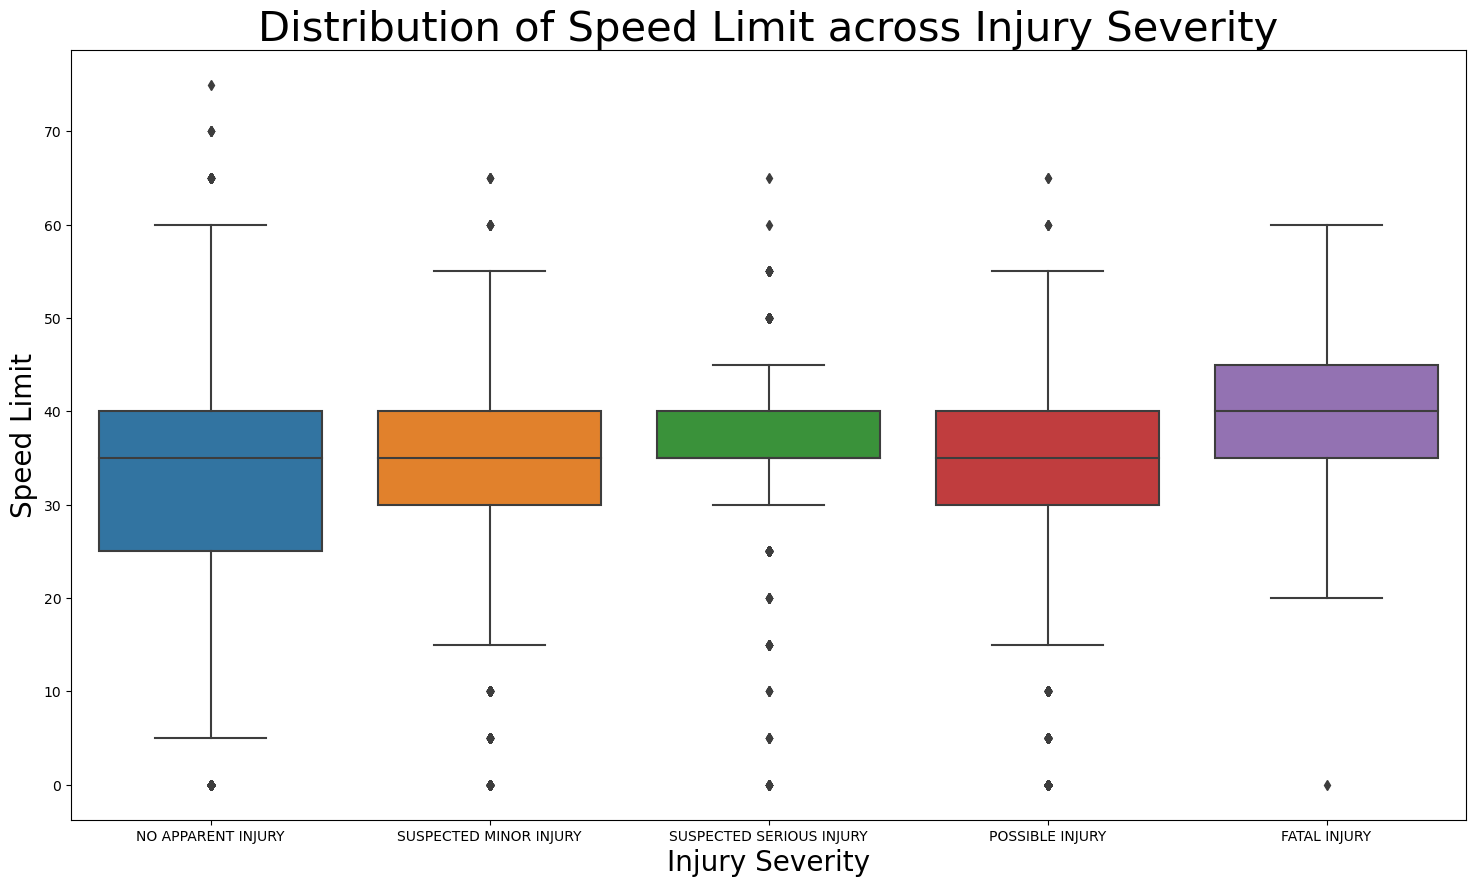

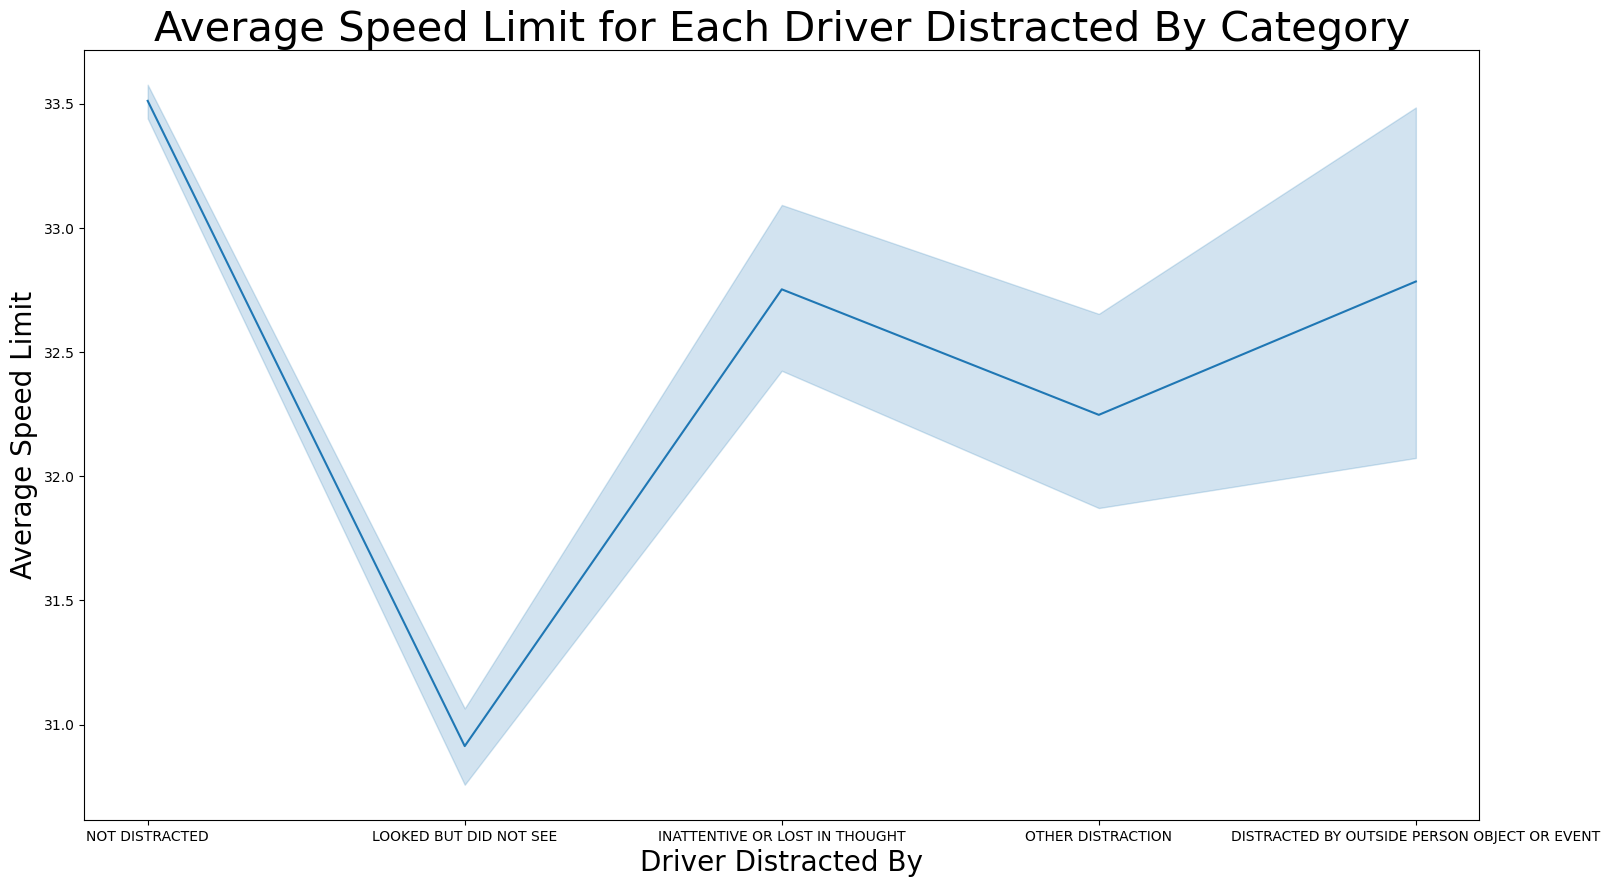

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # For treemap plot

# Function to clean and explore the dataset
def CleanData(raw_dataset_path, cleaned_dataset_path):
    # Define the columns to keep
    columns_to_keep = ['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time',
                       'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control',
                       'Driver Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance',
                       'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
                       'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type',
                       'Vehicle Movement', 'Speed Limit', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model',
                       'Equipment Problems', 'Latitude', 'Longitude']

    # Read the raw dataset
    raw_data = pd.read_csv(raw_dataset_path,low_memory=False)

    # Keep only the specified columns
    cleaned_data = raw_data[columns_to_keep]

    # Save the cleaned dataset
    cleaned_data.to_csv(cleaned_dataset_path, index=False)
    print("Cleaned dataset saved successfully.")

def PlotData(cleaned_dataset_path):
    cleaned_data = pd.read_csv(cleaned_dataset_path,low_memory=False)
    # Display descriptive statistics of the dataset
    print()
    print('Descriptive statistics of the dataset')
    print(cleaned_data.describe())

    # Explore data through visualizations
    # Plot 1: Report Number quantity per Light where Driver Substance Abuse contains "ALCOHOL PRESENT"
    plt.figure(figsize=(12, 6))
    filtered_data = cleaned_data.loc[
        (cleaned_data['Driver Substance Abuse'].str.contains('ALCOHOL PRESENT', na=False)) &
        (~cleaned_data['Light'].isin(['OTHER', 'UNKNOWN']))
    ]
    sns.countplot(x='Light', data=filtered_data)
    plt.title('Report Number per Light Conditions under (river Substance Abuse')
    plt.xlabel('Light')
    plt.ylabel('Report Number Quantity')
    plt.show()

    # Plot 2: Report Number per Crash Date/Time (YEAR)
    plt.figure(figsize=(12, 6))
    cleaned_data.loc[:, 'Crash Year'] = cleaned_data['Crash Date/Time'].str[6:10]  # Assuming the year is in the first four characters
    report_count_per_year = cleaned_data.groupby('Crash Year')['Report Number'].count()
    report_count_per_year.plot(kind='line')
    plt.title('Report Number Count per Crash Year')
    plt.xlabel('Crash Year')
    plt.ylabel('Report Number Count')
    plt.show()

    # Plot 3: Average Speed Limit per Injury Severity
    plt.figure(figsize=(10, 8))
    avg_speed_per_injury = cleaned_data.groupby('Injury Severity')['Speed Limit'].mean()
    plt.pie(avg_speed_per_injury, labels=avg_speed_per_injury.index, autopct='%1.1f%%', startangle=140)
    plt.title('Average Speed Limit per Injury Severity - Pie Chart')
    plt.show()

    # Plot 4: Report Number quantity per Weather excluding "OTHER", "UNKNOWN", and blanks on Weather
    plt.figure(figsize=(12, 8))
    filtered_data_weather = cleaned_data.loc[
        (~cleaned_data['Weather'].isin(['OTHER', 'UNKNOWN', ''])), 'Weather'
    ]
    weather_counts = filtered_data_weather.value_counts()

    # Create a color palette for treemap
    colors = sns.color_palette('viridis', len(weather_counts))
    # Plot treemap
    squarify.plot(sizes=weather_counts, color=colors, alpha=0.8, text_kwargs={'fontsize': 12})
    plt.title('Report Number per Weather')
    plt.axis('off')
    # Add color labels on the side as a reference
    color_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                     for label, color in zip(weather_counts.index, colors)]
    plt.legend(handles=color_patches, loc='lower right')
    plt.show()
    
    # Convert 'Driver Substance Abuse' column to categorical for plotting
    cleaned_data['Driver Substance Abuse'] = pd.Categorical(cleaned_data['Driver Substance Abuse'], categories=['ALCOHOL PRESENT','ALCOHOL CONTRIBUTED','ILLEGAL DRUG PRESENT','ILLEGAL DRUG CONTRIBUTED','MEDICATION PRESENT','MEDICATION CONTRIBUTED','COMBINED SUBSTANCE PRESENT','COMBINATION CONTRIBUTED'])

# How does substance abuse affect the outcome of car accidents?
# Plot 5:  Bar plot - Count of Substance Abuse
    plt.figure(figsize=(24, 14))
    sns.countplot(x='Driver Substance Abuse', data=cleaned_data)
    plt.title('Count of Substance Abuse in Crash Incidents',fontsize = 40)
    plt.xlabel('Driver Substance Abuse',fontsize = 30)
    plt.ylabel('Report Number Quantity',fontsize = 30)
    plt.show()
    
# Plot 6:  Pie chart - Proportion of Substance Abuse
    plt.figure(figsize=(14, 14))
    substance_abuse_counts = cleaned_data['Driver Substance Abuse'].value_counts()
    plt.pie(substance_abuse_counts, labels=substance_abuse_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Proportion of Substance Abuse in Crash Incidents',fontsize = 30)
    plt.show()

# What is the impact of substance abuse and injury severity in crashes?
# Plot 7: Stacked bar plot - Substance Abuse vs Injury Severity
    plt.figure(figsize=(24, 10))
    sns.countplot(x='Driver Substance Abuse', hue='Injury Severity', data=cleaned_data)
    plt.title('Substance Abuse vs. Injury Severity in Crash Incidents',fontsize = 40)
    plt.xlabel('Driver Substance Abuse',fontsize = 30)
    plt.ylabel('Number of Injury Severity',fontsize = 30)
    plt.legend(title='Injury Severity',fontsize = 20)
    plt.show()

    counts = cleaned_data['Driver Distracted By'].value_counts().head(6)
    
# What are the Top 5 cases of distracted drivers in car accidents?    
# Plot 8:  Count Plot - Distribution of Driver Distracted By
    plt.figure(figsize=(28, 16))
    filtered_data = cleaned_data[cleaned_data['Driver Distracted By'] != 'UNKNOWN']
    sns.countplot(x='Driver Distracted By', data=filtered_data[filtered_data['Driver Distracted By'].isin(counts.index)])
    plt.title('Top 5 Distribution of Driver Distracted By in Crash Incidents',fontsize = 30)
    plt.xlabel('Driver Distracted By',fontsize = 20)
    plt.ylabel('Report Number Quantity',fontsize = 20)
    plt.show()
    
    
# What is the Distribution of Speed Limits by Injury Severity?
# Plot 9: Box plot to compare 'Speed Limit' across different Injury Severity by categories
    plt.figure(figsize=(18, 10))
    sns.boxplot(x='Injury Severity', y='Speed Limit', data=cleaned_data)
    plt.title('Distribution of Speed Limit across Injury Severity',fontsize = 30)
    plt.xlabel('Injury Severity',fontsize = 20)
    plt.ylabel('Speed Limit',fontsize = 20)
    plt.show()

# What is the Average Speed Limit for the Top 5 Reasons for a Distracted Driver by Category?   
    counts = cleaned_data['Driver Distracted By'].value_counts().head(6)
# Plot 10: Plotting the average speed limit for each Driver Distracted By category
    plt.figure(figsize=(18, 10))
    sns.lineplot(x='Driver Distracted By', y='Speed Limit', data=filtered_data[filtered_data['Driver Distracted By'].isin(counts.index)])
    plt.title('Average Speed Limit for Each Driver Distracted By Category',fontsize = 30)
    plt.xlabel('Driver Distracted By',fontsize = 20)
    plt.ylabel('Average Speed Limit',fontsize = 20)
    plt.show()
    

CleanData('Crash_Reporting_-_Drivers_Data.csv', 'cleaned_dataset.csv')
PlotData('cleaned_dataset.csv')
